# Kaggle Project - House Prices - Advanced Regression Techniques

## Arkaprabha Poddar



#### Importing packages


In [81]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import svm, preprocessing
from sklearn.metrics import mean_squared_error

#### Reading data and cheking data shape

In [82]:
data=pd.read_csv(r'train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [83]:
data.shape

(1460, 81)

#### Inspecting and removing null values

In [84]:
data.isnull().sum().head(50)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley           1369
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [85]:
data.isnull().sum().tail(50)

BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1453
Fence            1179
MiscFeature      1406
MiscVal             0
MoSold    

#### Deleting all the columns where around 50% of the rows have null values

In [86]:
data=data.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'], axis='columns')

In [87]:
data=data.drop(["GarageYrBlt"], axis="columns")
data=data.drop(["Id"], axis="columns")
data.shape

(1460, 74)

#### Replacing null values with mean and mode

In [88]:
data["LotFrontage"]=data["LotFrontage"].fillna(data["LotFrontage"].mean())

data['BsmtExposure']=data['BsmtExposure'].fillna(data['BsmtExposure'].mode()[0])
data['BsmtFinType 2']=data['BsmtFinType2'].fillna(data['BsmtFinType2'].mode()[0])
data['MasVnrType']=data['MasVnrType'].fillna(data['MasVnrType'].mode()[0])
data['MasVnrArea']=data['MasVnrArea'].fillna(data['MasVnrArea'].mode()[0])
data['BsmtQual']=data['BsmtQual'].fillna(data['BsmtQual'].mode()[0])
data['BsmtCond']=data['BsmtCond'].fillna(data['BsmtCond'].mode()[0])
data['BsmtFinType1']=data['BsmtFinType1'].fillna(data['BsmtFinType1'].mode()[0])
data['BsmtFinSF1']=data['BsmtFinSF1'].fillna(data['BsmtFinSF1'].mode()[0])
data['BsmtFinSF2']=data['BsmtFinSF2'].fillna(data['BsmtFinSF2'].mode()[0])
data['BsmtUnfSF']=data['BsmtUnfSF'].fillna(data['BsmtUnfSF'].mode()[0])
data['TotalBsmtSF']=data['TotalBsmtSF'].fillna(data['TotalBsmtSF'].mode()[0])
data['Electrical']=data['Electrical'].fillna(data['Electrical'].mode()[0])
data['BsmtFullBath']=data['BsmtFullBath'].fillna(data['BsmtFullBath'].mode()[0])
data['BsmtHalfBath']=data['BsmtHalfBath'].fillna(data['BsmtHalfBath'].mode()[0])
data['GarageType']=data['GarageType'].fillna(data['GarageType'].mode()[0])
data['GarageFinish']=data['GarageFinish'].fillna(data['GarageFinish'].mode()[0])
data['GarageCars']=data['GarageCars'].fillna(data['GarageCars'].mode()[0])
data['GarageArea']=data['GarageArea'].fillna(data['GarageArea'].mode()[0])
data['GarageQual']=data['GarageQual'].fillna(data['GarageQual'].mode()[0])
data['GarageCond']=data['GarageCond'].fillna(data['GarageCond'].mode()[0])

data['MSZoning']=data['MSZoning'].fillna(data['MSZoning'].mode()[0])
data['Utilities']=data['Utilities'].fillna(data['Utilities'].mode()[0])
data['Exterior1st']=data['Exterior1st'].fillna(data['Exterior1st'].mode()[0])
data['Exterior2nd']=data['Exterior2nd'].fillna(data['Exterior2nd'].mode()[0])
data['BsmtFinType2']=data['BsmtFinType2'].fillna(data['BsmtFinType2'].mode()[0])
data['KitchenQual']=data['KitchenQual'].fillna(data['KitchenQual'].mode()[0])
data['Functional']=data['Functional'].fillna(data['Functional'].mode()[0])


data['SaleType']=data['SaleType'].fillna(data['SaleType'].mode()[0])


In [89]:
((data.isnull().sum()).sum())

0

In [90]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,BsmtFinType 2
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,2008,WD,Normal,208500,Unf
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,5,2007,WD,Normal,181500,Unf
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,9,2008,WD,Normal,223500,Unf
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,2,2006,WD,Abnorml,140000,Unf
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,12,2008,WD,Normal,250000,Unf


#### Distribution of selling prices

<AxesSubplot:>

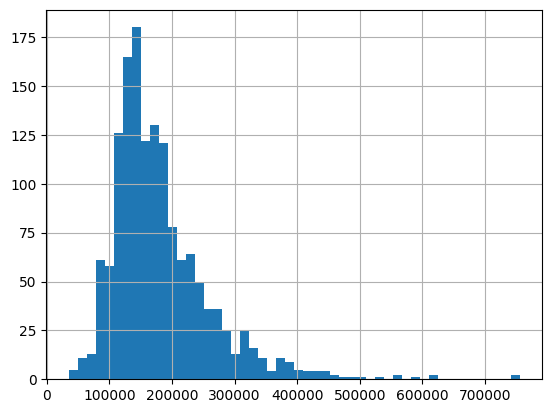

In [91]:
data.SalePrice.dropna().hist(bins=50) 

In [92]:
filter=(data['SalePrice']>400000)
data=data[~filter]
data.shape

(1432, 75)

#### Distribution of Sale Prices after dropping outliers

<AxesSubplot:>

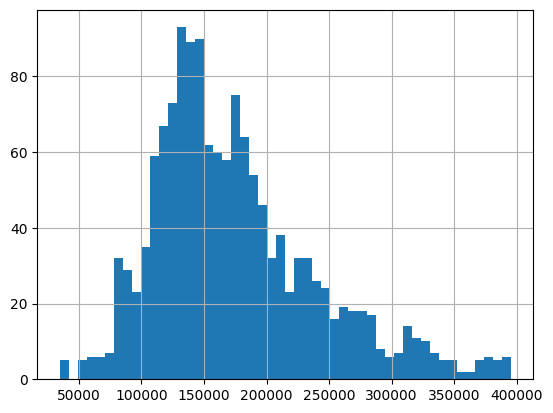

In [93]:
data.SalePrice.dropna().hist(bins=50) 

In [94]:
data['SalePrice'].skew()

0.940196304937411

#### Considering some of the variables that cannot be renovated, like: 
- Neighborhood
- Bedroom/Kitchen
- Functional 
- Garage Quality

#### Neighborhood and Sale Price Plot

C:\Users\ARKAPRABHA\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


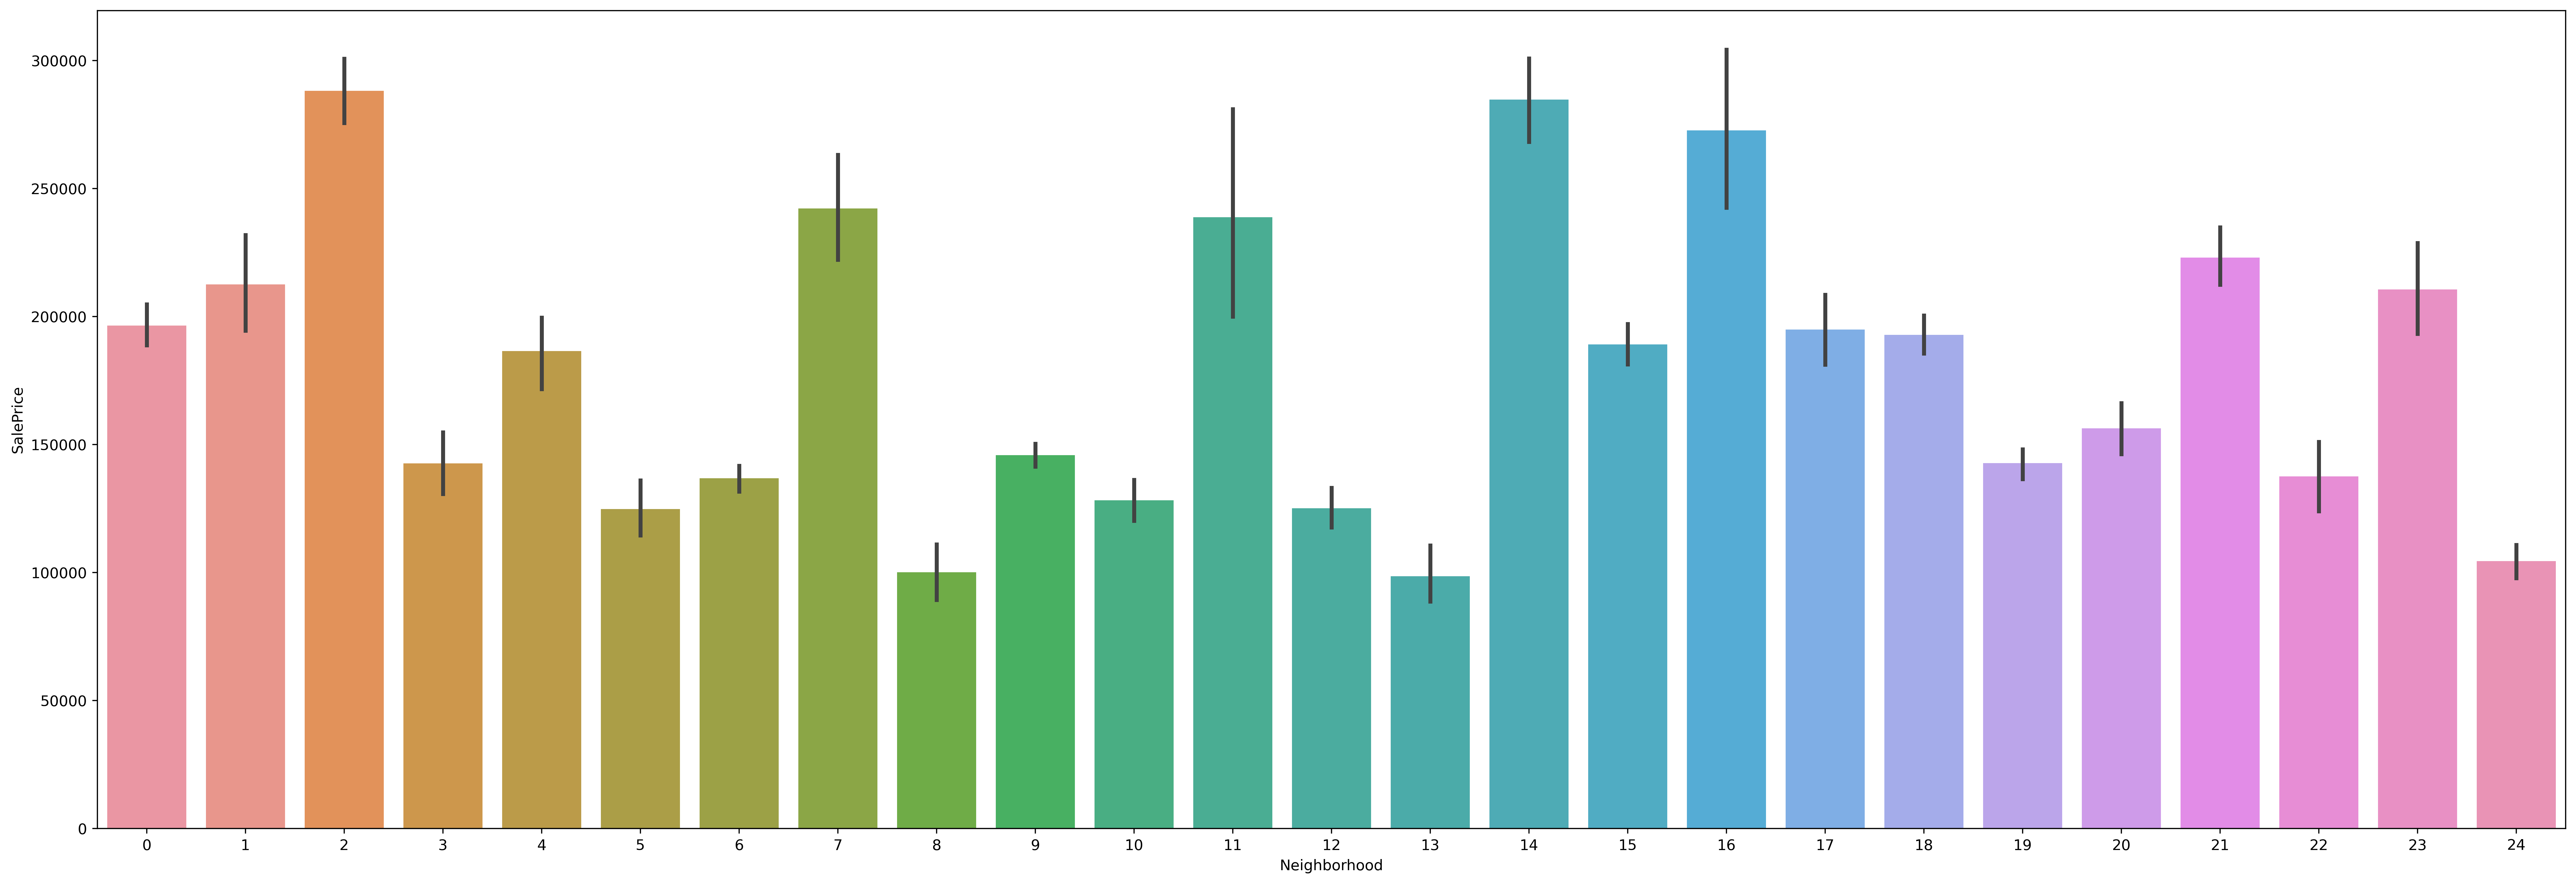

In [163]:
plt.figure(figsize=(30,10), dpi = 400)
sample=data.sort_values("Neighborhood")
sns.barplot(data["Neighborhood"], data["SalePrice"])
plt.show()

#### Garage Quality and Sale Price Plot

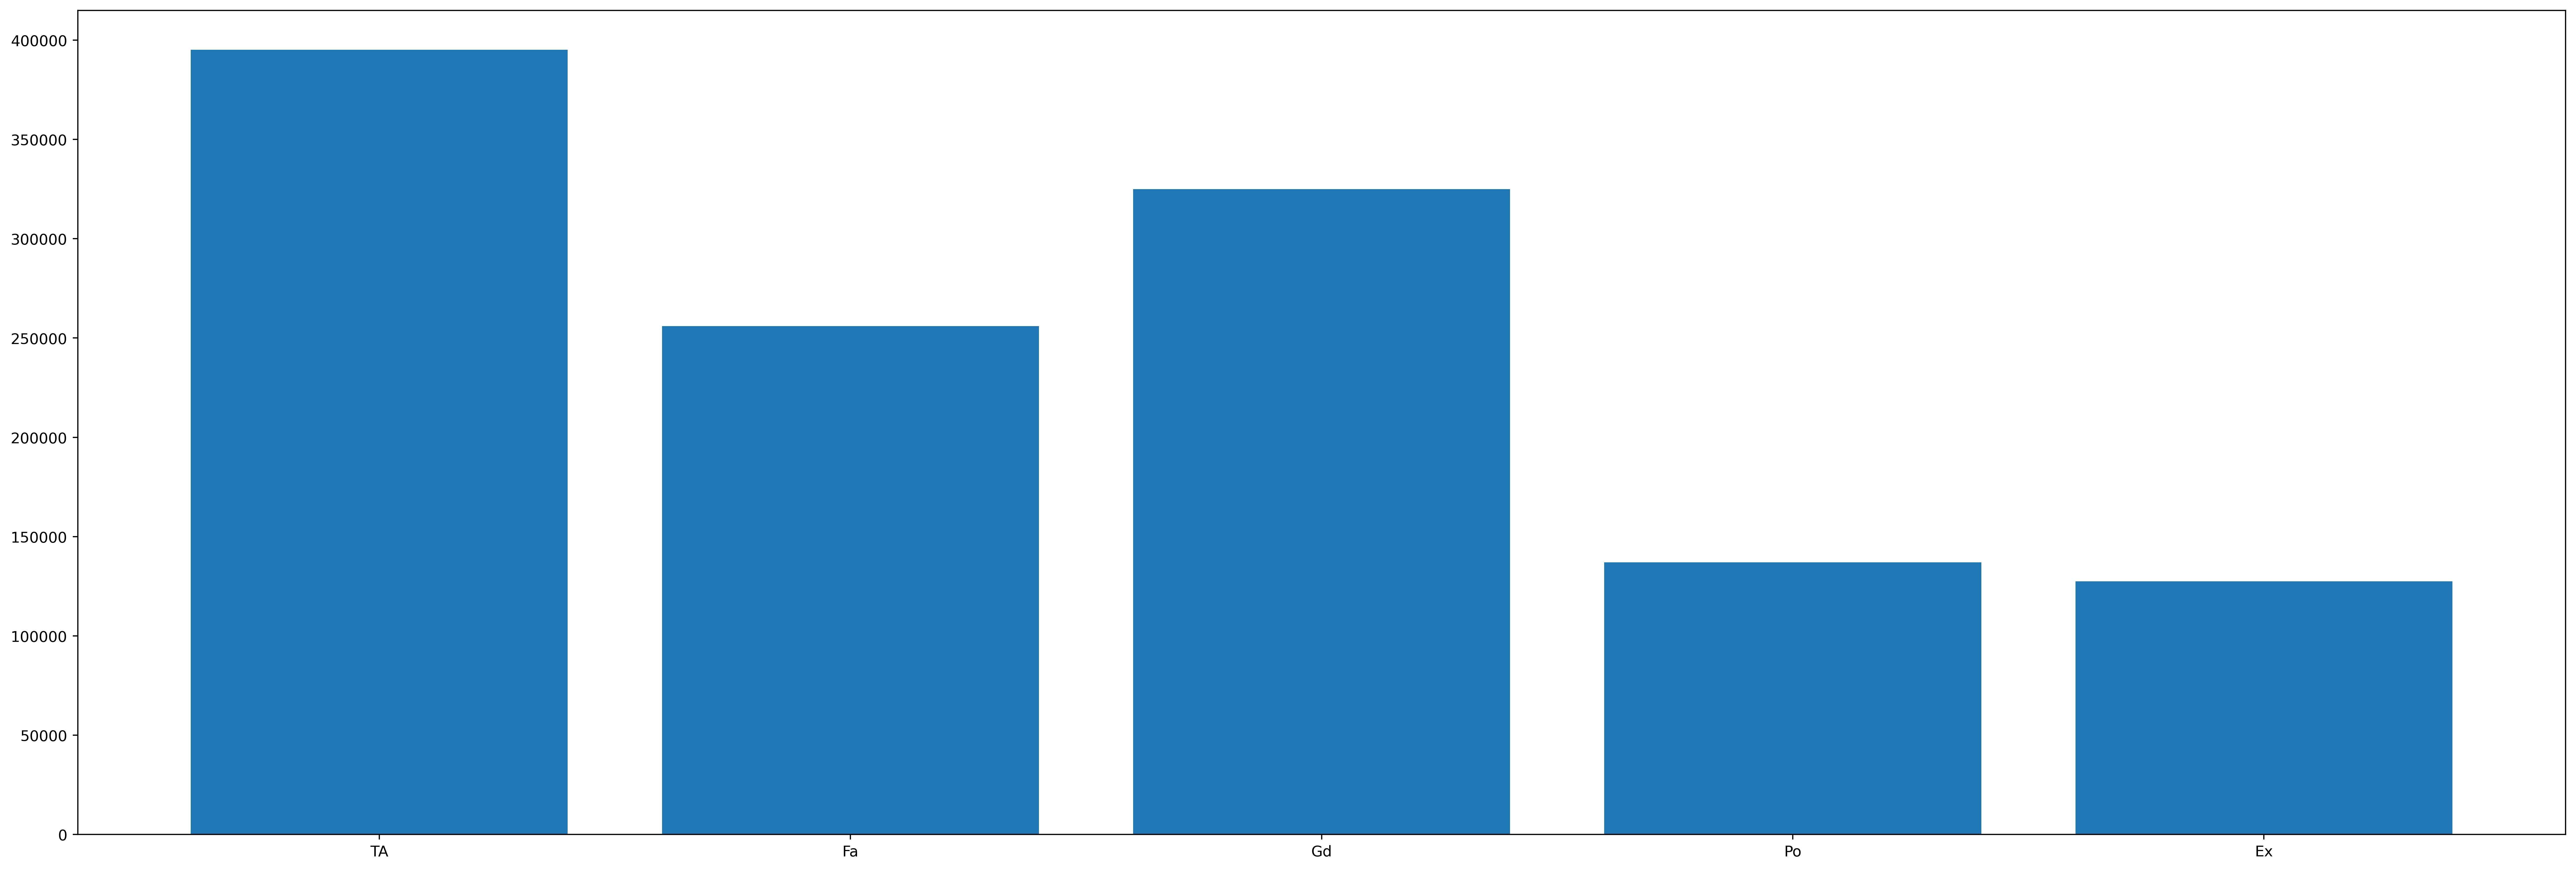

In [96]:
plt.figure(figsize=(30,10), dpi = 400)
sample=data.sort_values("GarageQual")
plt.bar(data["GarageQual"], data["SalePrice"])
plt.show()

#### Here, we can see that the houses with garage in Typical/Average condition and Excellent condition are the most expensive ones

#### Overall Quality and Sale Price plot

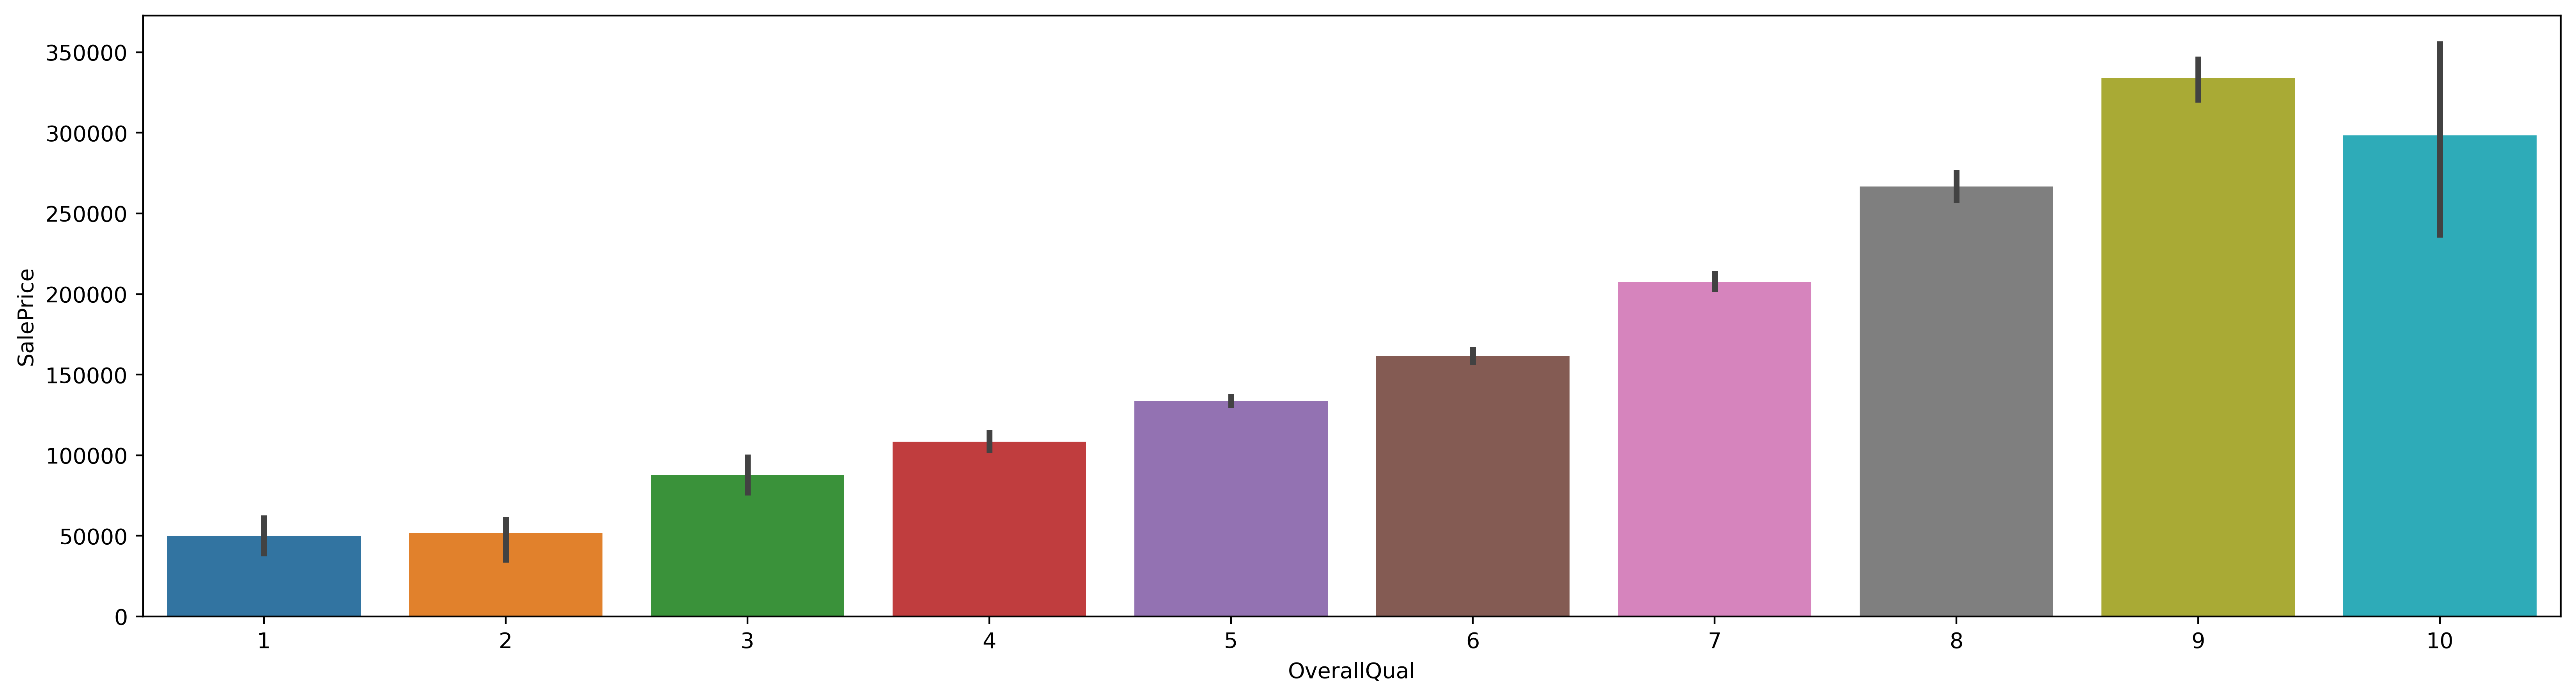

In [97]:
plt.subplots(figsize=(20, 5), dpi = 400)
sns.barplot(x=data['OverallQual'], y=data['SalePrice'])
plt.show()

In [98]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,BsmtFinType 2
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,2008,WD,Normal,208500,Unf
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,5,2007,WD,Normal,181500,Unf
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,9,2008,WD,Normal,223500,Unf
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,2,2006,WD,Abnorml,140000,Unf
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,12,2008,WD,Normal,250000,Unf


#### Changing the non numeric data to numeric data

In [99]:
def non_numeric_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit = {}
        def convert_to_int(key):
            return text_digit[key]
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_content = df[column].values.tolist()
            unique_elements = set(column_content)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit:
                    text_digit[unique]= x
                    x = x+1
            df[column] = list(map(convert_to_int, df[column]))
    return df

In [100]:
new_test_dataset["LotFrontage"]=new_test_dataset["LotFrontage"].fillna(new_test_dataset["LotFrontage"].mean())

new_test_dataset['BsmtExposure']=new_test_dataset['BsmtExposure'].fillna(new_test_dataset['BsmtExposure'].mode()[0])
new_test_dataset['BsmtFinType 2']=new_test_dataset['BsmtFinType2'].fillna(new_test_dataset['BsmtFinType2'].mode()[0])
new_test_dataset['MasVnrType']=new_test_dataset['MasVnrType'].fillna(new_test_dataset['MasVnrType'].mode()[0])
new_test_dataset['MasVnrArea']=new_test_dataset['MasVnrArea'].fillna(new_test_dataset['MasVnrArea'].mode()[0])
new_test_dataset['BsmtQual']=new_test_dataset['BsmtQual'].fillna(new_test_dataset['BsmtQual'].mode()[0])
new_test_dataset['BsmtCond']=new_test_dataset['BsmtCond'].fillna(new_test_dataset['BsmtCond'].mode()[0])
new_test_dataset['BsmtFinType1']=new_test_dataset['BsmtFinType1'].fillna(new_test_dataset['BsmtFinType1'].mode()[0])
new_test_dataset['BsmtFinSF1']=new_test_dataset['BsmtFinSF1'].fillna(new_test_dataset['BsmtFinSF1'].mode()[0])
new_test_dataset['BsmtFinSF2']=new_test_dataset['BsmtFinSF2'].fillna(new_test_dataset['BsmtFinSF2'].mode()[0])
new_test_dataset['BsmtUnfSF']=new_test_dataset['BsmtUnfSF'].fillna(new_test_dataset['BsmtUnfSF'].mode()[0])
new_test_dataset['TotalBsmtSF']=new_test_dataset['TotalBsmtSF'].fillna(new_test_dataset['TotalBsmtSF'].mode()[0])
new_test_dataset['Electrical']=new_test_dataset['Electrical'].fillna(new_test_dataset['Electrical'].mode()[0])
new_test_dataset['BsmtFullBath']=new_test_dataset['BsmtFullBath'].fillna(new_test_dataset['BsmtFullBath'].mode()[0])
new_test_dataset['BsmtHalfBath']=new_test_dataset['BsmtHalfBath'].fillna(new_test_dataset['BsmtHalfBath'].mode()[0])
new_test_dataset['GarageType']=new_test_dataset['GarageType'].fillna(new_test_dataset['GarageType'].mode()[0])
new_test_dataset['GarageFinish']=new_test_dataset['GarageFinish'].fillna(new_test_dataset['GarageFinish'].mode()[0])
new_test_dataset['GarageCars']=new_test_dataset['GarageCars'].fillna(new_test_dataset['GarageCars'].mode()[0])
new_test_dataset['GarageArea']=new_test_dataset['GarageArea'].fillna(new_test_dataset['GarageArea'].mode()[0])
new_test_dataset['GarageQual']=new_test_dataset['GarageQual'].fillna(new_test_dataset['GarageQual'].mode()[0])
new_test_dataset['GarageCond']=new_test_dataset['GarageCond'].fillna(new_test_dataset['GarageCond'].mode()[0])

new_test_dataset['MSZoning']=new_test_dataset['MSZoning'].fillna(new_test_dataset['MSZoning'].mode()[0])
new_test_dataset['Utilities']=new_test_dataset['Utilities'].fillna(new_test_dataset['Utilities'].mode()[0])
new_test_dataset['Exterior1st']=new_test_dataset['Exterior1st'].fillna(new_test_dataset['Exterior1st'].mode()[0])
new_test_dataset['Exterior2nd']=new_test_dataset['Exterior2nd'].fillna(new_test_dataset['Exterior2nd'].mode()[0])
new_test_dataset['BsmtFinType2']=new_test_dataset['BsmtFinType2'].fillna(new_test_dataset['BsmtFinType2'].mode()[0])
new_test_dataset['KitchenQual']=new_test_dataset['KitchenQual'].fillna(new_test_dataset['KitchenQual'].mode()[0])
new_test_dataset['Functional']=new_test_dataset['Functional'].fillna(new_test_dataset['Functional'].mode()[0])


new_test_dataset['SaleType']=new_test_dataset['SaleType'].fillna(new_test_dataset['SaleType'].mode()[0])



In [162]:
new_test_dataset=new_test_dataset.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'], axis='columns')
new_test_dataset=new_test_dataset.drop(["GarageYrBlt"], axis="columns")
new_test_dataset=new_test_dataset.drop(["Id"], axis="columns")
new_test_dataset.shape

KeyError: "['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'] not found in axis"

In [102]:
new_test_dataset = non_numeric_data(test)
new_test_dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,BsmtFinType 2
0,1461,20,1,80.0,11622,0,2,1,1,0,...,0,2,4,3,0,6,2010,9,4,6
1,1462,20,2,81.0,14267,0,2,0,1,0,...,0,2,2,1,12500,6,2010,9,4,0
2,1463,60,2,74.0,13830,0,2,0,1,0,...,0,2,4,3,0,3,2010,9,4,0
3,1464,60,2,78.0,9978,0,2,0,1,0,...,0,2,2,3,0,6,2010,9,4,0
4,1465,120,2,43.0,5005,0,2,0,0,0,...,0,2,2,3,0,1,2010,9,4,0


In [104]:
new_test_dataset.isnull().sum().head()

Id             0
MSSubClass     0
MSZoning       0
LotFrontage    0
LotArea        0
dtype: int64

In [105]:
numericData= non_numeric_data(data)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,BsmtFinType 2
0,60,2,65.0,8450,0,1,1,1,4,2,...,0,0,0,0,2,2008,8,4,208500,0
1,20,2,80.0,9600,0,1,1,1,3,2,...,0,0,0,0,5,2007,8,4,181500,0
2,60,2,68.0,11250,0,0,1,1,4,2,...,0,0,0,0,9,2008,8,4,223500,0
3,70,2,60.0,9550,0,0,1,1,2,2,...,0,0,0,0,2,2006,8,0,140000,0
4,60,2,84.0,14260,0,0,1,1,3,2,...,0,0,0,0,12,2008,8,4,250000,0


#### Checking correlation between data features and target variable (SalePrice)

In [106]:
correlation = []
for item in numericData:
    correlation.append((numericData[item].corr(numericData['SalePrice'])))

In [107]:
correlationData = pd.DataFrame({'column': numericData.columns,'correlation': correlation})

In [108]:
correlationData = correlationData.sort_values(by='correlation', ascending=False)
correlationData.head(20)

,column,correlation
73,SalePrice,1.000000
15,OverallQual,0.794784
44,GrLivArea,0.663579
57,GarageCars,0.646759
58,GarageArea,0.624492
36,TotalBsmtSF,0.575020
41,1stFlrSF,0.564498
17,YearBuilt,0.558338
47,FullBath,0.556311
18,YearRemodAdd,0.538547


#### Features that can be used to predict Sale Price

In [109]:
filter=(correlationData['correlation']<0.5)
features = correlationData[~filter]
features

,column,correlation
73,SalePrice,1.000000
15,OverallQual,0.794784
44,GrLivArea,0.663579
57,GarageCars,0.646759
58,GarageArea,0.624492
36,TotalBsmtSF,0.575020
41,1stFlrSF,0.564498
17,YearBuilt,0.558338
47,FullBath,0.556311
18,YearRemodAdd,0.538547


In [110]:
features1= list(features['column'])
features1

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'YearBuilt',
 'FullBath',
 'YearRemodAdd']

In [111]:
featureData = numericData[{'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'YearBuilt',
 'TotalBsmtSF',
 '1stFlrSF',
 'YearRemodAdd',
 'YearBuilt',
 'FullBath',
 'SalePrice'}]
featureData

C:\Users\ARKAPRABHA\AppData\Local\Temp\ipykernel_8444\482743146.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  featureData = numericData[{'OverallQual',


,SalePrice,TotalBsmtSF,GarageCars,YearBuilt,YearRemodAdd,1stFlrSF,OverallQual,GarageArea,FullBath,GrLivArea
0,208500,856,2,2003,2003,856,7,548,2,1710
1,181500,1262,2,1976,1976,1262,6,460,2,1262
2,223500,920,2,2001,2002,920,7,608,2,1786
3,140000,756,3,1915,1970,961,7,642,1,1717
4,250000,1145,3,2000,2000,1145,8,836,2,2198
...,...,...,...,...,...,...,...,...,...,...
1455,175000,953,2,1999,2000,953,6,460,2,1647
1456,210000,1542,2,1978,1988,2073,6,500,2,2073
1457,266500,1152,1,1941,2006,1188,7,252,2,2340
1458,142125,1078,1,1950,1996,1078,5,240,1,1078


<AxesSubplot:>

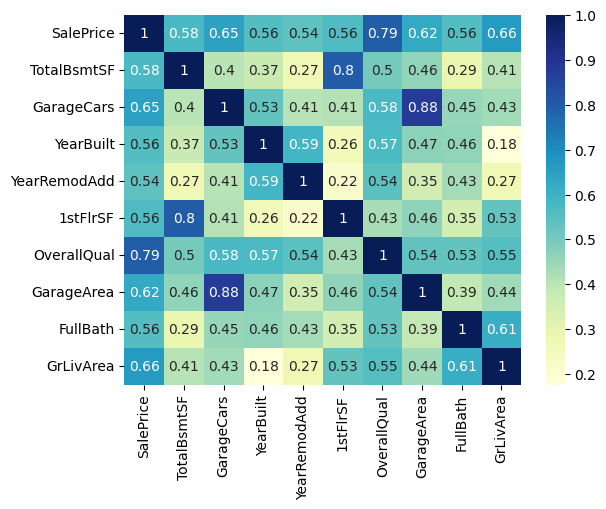

In [112]:
sns.heatmap(featureData.corr(), cmap="YlGnBu", annot=True)

#### The above mentioned features are the variables that effect the Sale Price the most

#### Here, we can see GarageArea and GarageCar are highly correlated, hence we remove GarageArea
#### Similarly, we remove TotalBsmtSF

In [113]:
featureData=featureData.drop(['GarageArea','TotalBsmtSF'], axis='columns')


In [114]:
featureData.head()

,SalePrice,GarageCars,YearBuilt,YearRemodAdd,1stFlrSF,OverallQual,FullBath,GrLivArea
0,208500,2,2003,2003,856,7,2,1710
1,181500,2,1976,1976,1262,6,2,1262
2,223500,2,2001,2002,920,7,2,1786
3,140000,3,1915,1970,961,7,1,1717
4,250000,3,2000,2000,1145,8,2,2198


#### Feature Scaling

In [115]:
xData = numericData[{'OverallQual',
 'GrLivArea',
 'GarageCars',
 'YearBuilt',
 '1stFlrSF',
 'YearRemodAdd',
 'FullBath'}]
xData

C:\Users\ARKAPRABHA\AppData\Local\Temp\ipykernel_8444\2278598020.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  xData = numericData[{'OverallQual',


,GarageCars,1stFlrSF,OverallQual,YearBuilt,FullBath,YearRemodAdd,GrLivArea
0,2,856,7,2003,2,2003,1710
1,2,1262,6,1976,2,1976,1262
2,2,920,7,2001,2,2002,1786
3,3,961,7,1915,1,1970,1717
4,3,1145,8,2000,2,2000,2198
...,...,...,...,...,...,...,...
1455,2,953,6,1999,2,2000,1647
1456,2,2073,6,1978,2,1988,2073
1457,1,1188,7,1941,2,2006,2340
1458,1,1078,5,1950,1,1996,1078


In [116]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dataScaled = sc.fit_transform(xData)

#### Applying Principal Component Analysis 

In [117]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(dataScaled)

PCA()

#### Checking for Eigenvalues

In [118]:
print("Eigenvalues:")
print(pca.explained_variance_)
print()

Eigenvalues:
[3.69770508 1.10715253 0.65580974 0.52304568 0.43478481 0.36427284
 0.22212101]



#### Checking for variances

In [119]:
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

Variances (Percentage):
[52.78746979 15.80541968  9.36216822  7.46686319  6.20687409  5.20026364
  3.17094139]



#### Scree plot

Text(0, 0.5, 'Explained variance (%)')

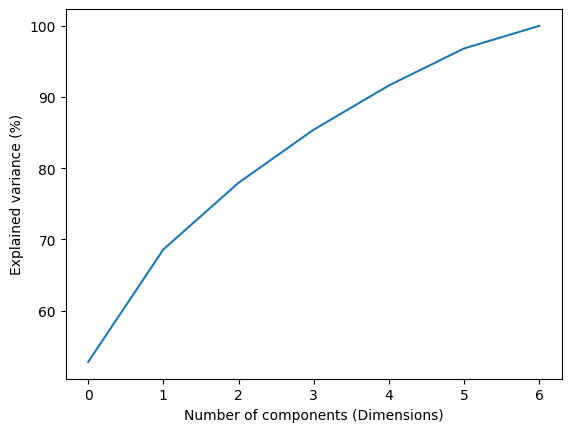

In [120]:
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")

#### Running PCA again with 3 components

In [121]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dataScaled = sc.fit_transform(featureData)

# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
dataPCA = pca.fit_transform(dataScaled)

# Transformed dataset
dataPCA = pd.DataFrame(dataPCA)
print("\nSize: ")
print(dataPCA.shape)
dataPCA.head()


Size: 
(1432, 3)


,0,1,2
0,1.478525,-1.080035,-0.886564
1,0.306917,0.060318,0.020786
2,1.642059,-0.845447,-0.822366
3,-0.500681,1.029061,0.657569
4,3.023466,-0.175091,-0.210201


#### Creating the HeatMap

<AxesSubplot:>

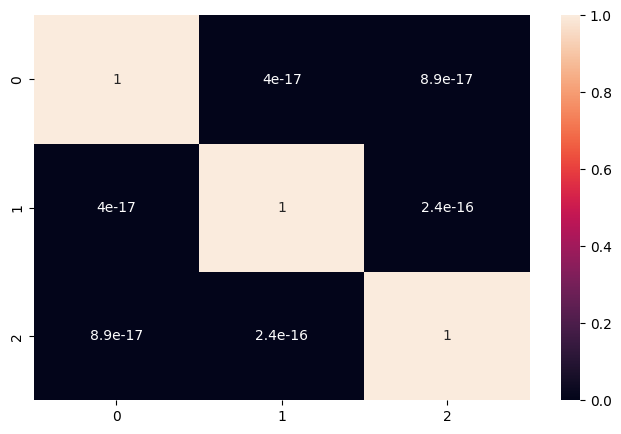

In [122]:
plt.figure(figsize=(8, 5))
sns.heatmap(dataPCA.corr(), annot=True)

#### Heatmap depicting very less correlation among independent variables

In [123]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.decomposition import PCA

In [124]:
X = featureData.drop(['SalePrice'], axis = 'columns')
Y = featureData['SalePrice']
X.shape

(1432, 7)

In [125]:
X_mm = StandardScaler().fit_transform(X)

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X_mm, Y, test_size = 0.1, random_state = 72)

In [127]:
y_train_rt4 = np.sqrt(np.sqrt(y_train))

In [128]:
estimator = RandomForestRegressor(n_estimators = 500, max_features = 'sqrt', 
                                  bootstrap = True, random_state = 72, max_samples = 0.3,
                                  warm_start = False)
pred = cross_val_predict(estimator, X_train, y_train_rt4, cv = 4)
print(round(r2_score(y_train, pred**4), 3))

0.823


In [129]:
estimator.fit(X_train, y_train_rt4)
y_hat = estimator.predict(X_test)
r2_score(y_test, y_hat**4)

0.8467449656753869

In [130]:
Input = [('scale', StandardScaler()),
         ('model', RandomForestRegressor(n_estimators = 500, max_features = 'sqrt', 
                                         bootstrap = True, random_state = 72, max_samples = 0.8, 
                                         warm_start = False))
        ]

In [131]:
y_rt4 = np.sqrt(np.sqrt(Y))

In [132]:
est_rf = Pipeline(Input)
est_rf.fit(X, y_rt4)
y_hat = est_rf.predict(X)
print(round(r2_score(Y, y_hat**4), 3))

0.965


In [133]:
estimator = GradientBoostingRegressor(n_estimators = 80)
pred = cross_val_predict(estimator, X_train, y_train_rt4, cv = 4)
print(round(r2_score(y_train, pred**4), 3))

0.839


In [134]:
estimator.fit(X_train, y_train_rt4)
y_hat_rt4 = estimator.predict(X_test)
y_hat = y_hat_rt4**4
r2_score(y_test, y_hat)

0.8604195817035001

In [135]:
Input = [('scale', StandardScaler()),
         ('model', GradientBoostingRegressor(n_estimators = 80, random_state = 72))
        ]
y_rt4 = np.sqrt(np.sqrt(Y))

est_gb = Pipeline(Input)
est_gb.fit(X, y_rt4)
y_hat_rt4 = est_gb.predict(X)
print(round(r2_score(Y, y_hat_rt4**4), 3))

0.894


In [136]:
test_data = pd.read_csv(r'test.csv')
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [137]:
ID = test_data.Id.to_list()
ID[0:5]


[1461, 1462, 1463, 1464, 1465]

In [138]:
X_t = test_data
test_data.shape

(1459, 80)

In [140]:
#X_t[skew_list] = np.sqrt(np.sqrt(X_t[skew_list]))

In [ ]:
#predictions1_rt4 = est_gb.predict(dataPCA)
#predictions1 = predictions1_rt4**4
#print(predictions1[:10])

In [141]:
X = np.array(numericData.drop(['SalePrice'], axis = 1))
y = np.array(numericData['SalePrice'])

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.2)

In [143]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1145, 74)
(287, 74)
(1145,)
(287,)


In [166]:
# train classifier
#clf = LinearRegression(fit_intercept= False, normalize= False, n_jobs=-1)
model = clf.fit(X_train, y_train)

C:\Users\ARKAPRABHA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


In [165]:
print(model.score(X_test, y_test))

0.8507625196428819


In [146]:
test=pd.read_csv('test.csv')

In [153]:
submission = pd.DataFrame({"Id":test["Id"],"SalePrice":model.predict(new_test_dataset)})

C:\Users\ARKAPRABHA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [1]:
submission.head()

NameError: name 'submission' is not defined